## Table of Contents
***
- [Introduction](#introduction)
- [Import necessary modules](#modules)
- [Review Variables](#review_variables)
- [Importing All Datasets](#import_data_sets)
- [Exploratory Data Analysis](#eda)


# Introduction
<a id="introduction"></a>
***
This kernel looks at the data and tries to find some interesting insights. As I continuously work on this dataset, each update comes with detailed analysis along with plots using Matplotly, Seaborn, Plotly as well as Tableau. So, let's jump in. 

***This Kernel is a work in progress. So please do come back to read more insights as I upload them.***

## Review Variables
<a id="review_variables"></a>
***

Incase you have missed the data description, I took the liberty to paste the following variables since understanding these concept will come in handy for my analysis report. 

**Zillow Home Value Index (ZHVI)**: A smoothed seasonally adjusted measure of the median estimated home value across a given region and housing type. A dollar denominated alternative to repeat-sales indices. Find a more detailed methodology here: http://www.zillow.com/research/zhvi-methodology-6032/

**Zillow Rent Index (ZRI)**: A smoothed seasonally adjusted measure of the median estimated market rate rent across a given region and housing type. A dollar denominated alternative to repeat-rent indices. Find a more detailed methodology here: http://www.zillow.com/research/zillow-rent-index-methodology-2393/





## Import necessary modules
<a id="modules"></a>
***


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from IPython.display import Image, display

# import plotly
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')


%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

"""from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))"""

# Any results you write to the current directory are saved as output.

'from subprocess import check_output\nprint(check_output(["ls", "../input"]).decode("utf8"))'

## Importing all the datasets
<a id="import_data_sets"></a>
***


In [5]:
state_time_series = pd.read_csv('~/datasets/zillow_data_economics/State_time_series.csv')
city_time_series = pd.read_csv('~/datasets/zillow_data_economics/State_time_series.csv')

In [6]:
"""## Importing all the datasets. Since this kernel will be continous working progress. 
cities_crosswalk = pd.read_csv('../input/cities_crosswalk.csv')

county_time_series = pd.read_csv('../input/County_time_series.csv')
metro_time_series = pd.read_csv('../input/Metro_time_series.csv')
neighborhood_time_series = pd.read_csv('../input/Neighborhood_time_series.csv')
zip_time_series = pd.read_csv('../input/Zip_time_series.csv')
countyCrossWalk_Zillow = pd.read_csv('../input/CountyCrossWalk_Zillow.csv')"""

"## Importing all the datasets. Since this kernel will be continous working progress. \ncities_crosswalk = pd.read_csv('../input/cities_crosswalk.csv')\n\ncounty_time_series = pd.read_csv('../input/County_time_series.csv')\nmetro_time_series = pd.read_csv('../input/Metro_time_series.csv')\nneighborhood_time_series = pd.read_csv('../input/Neighborhood_time_series.csv')\nzip_time_series = pd.read_csv('../input/Zip_time_series.csv')\ncountyCrossWalk_Zillow = pd.read_csv('../input/CountyCrossWalk_Zillow.csv')"

I am super interested in looking at the state dataset and comparing how the prices vary in different states for different aspects. I would also like to see the price changes over time in various states. To do all those and more, I think it would be best to use states dataset.

 ## Exploratory Data Analysis
<a id="eda"></a>
***



In [7]:
state_time_series.head(2)

,Date,RegionName,DaysOnZillow_AllHomes,HomesSoldAsForeclosuresRatio_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN


## Which states should you buy a house or Rent? 
***

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0,0.5,'Price')

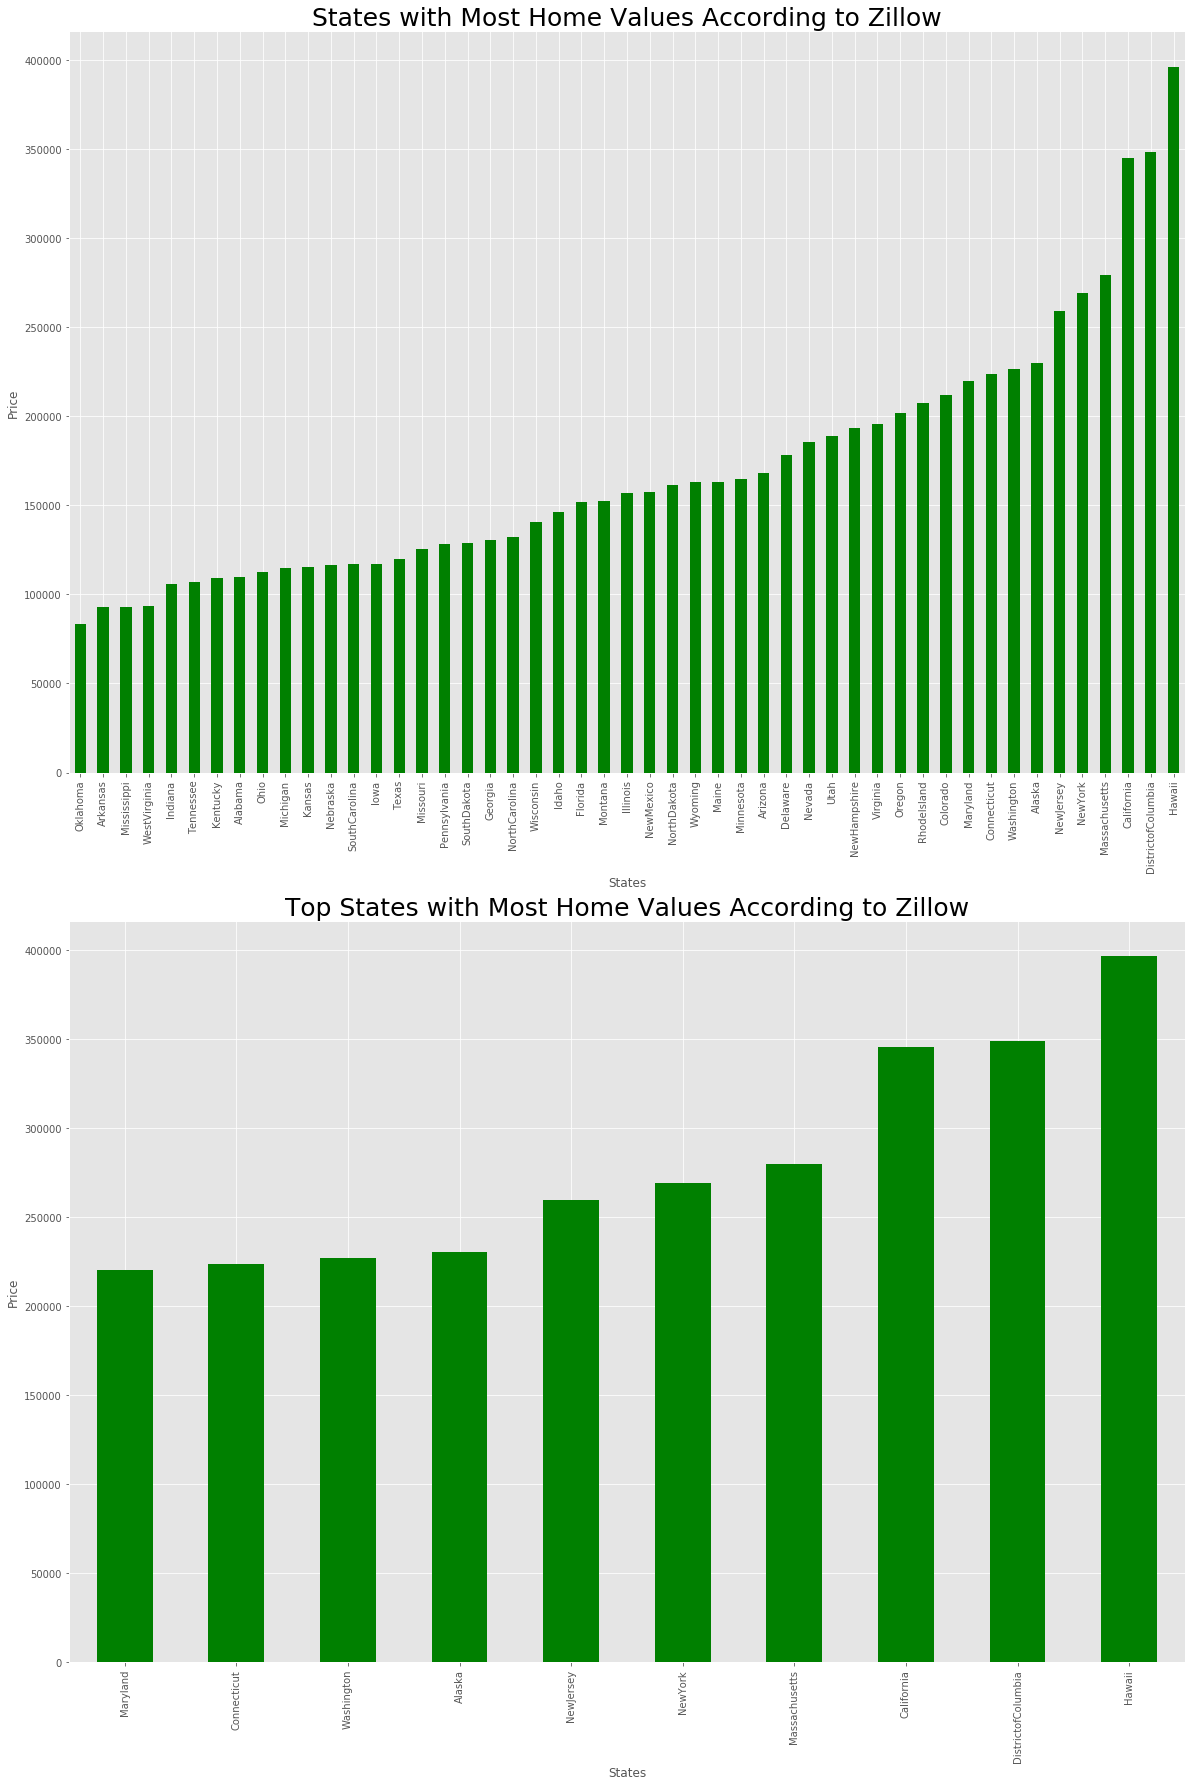

In [8]:
## Finding out top ten states with most ZHVI values. 
f, ax = plt.subplots(2,1, figsize=(20, 30))
state_time_series.Date = pd.to_datetime(state_time_series.Date) ## 
state_without_null = state_time_series.dropna(subset=['ZHVI_AllHomes'], how='any') ## getting rid of null values
state_without_null.Date = state_without_null.Date.dt.year ## set date to year.

state_without_null.groupby(state_without_null.RegionName)['ZHVI_AllHomes'].mean().sort_values().plot( kind = 'bar', ax =ax[0], color = 'g')
ax[0].set_title('States with Most Home Values According to Zillow', fontsize = 25)
ax[0].set_xlabel('States')
ax[0].set_ylabel('Price')


state_without_null.groupby(state_without_null.RegionName)['ZHVI_AllHomes'].mean().sort_values().tail(10).plot(kind = 'bar',ax =ax[1], color = 'g')
ax[1].set_title('Top States with Most Home Values According to Zillow', fontsize = 25)
ax[1].set_xlabel('States')
ax[1].set_ylabel('Price')

For this analysis, I will be looking at the top end states. According to Zillow's estimate, Hawaii is the top state with average home value close to 400K. Compared to the second most home value state District of Columbia with an average of 350K. Some other upper end ZHVI states are California, Massachusetts, New York, Alaska, Washingtion, Connecticut, Maryland and Colorado. However, the question is how has the price changed over time for these states. Because if we are looking to buy a house in one of these states, we need to know how the price have changed overtime. 

In [9]:
## lets create a dataframe with only the top states
top_states = state_without_null[(state_without_null.RegionName == "NewYork")|
                   (state_without_null.RegionName == "Washington")|
                   (state_without_null.RegionName == "Colorado")|
                   (state_without_null.RegionName == "Connecticut")|
                   (state_without_null.RegionName == "Maryland")|
                   (state_without_null.RegionName == "NewJersey")|
                   (state_without_null.RegionName == "Alaska")|
                   (state_without_null.RegionName == "Massachusetts")|
                   (state_without_null.RegionName == "California")|
                   (state_without_null.RegionName == "Hawaii")|
                   (state_without_null.RegionName == "DistrictofColumbia")]

Text(0.5,1,' ZHVI home values change in overtime for top expensive states')

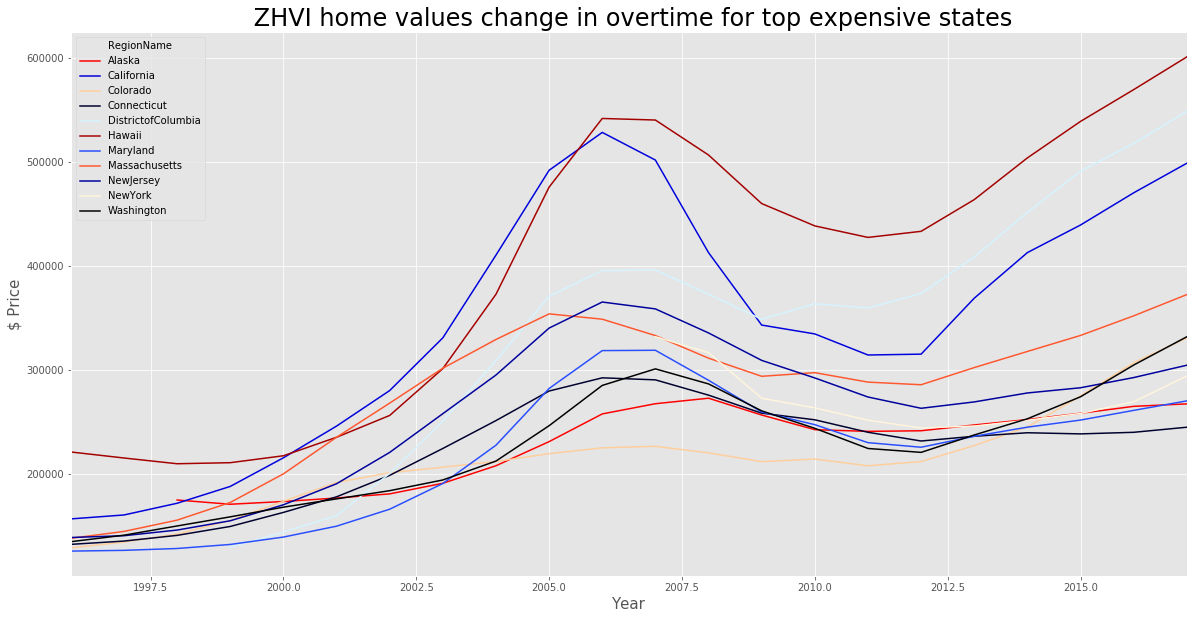

In [10]:
pd.pivot_table(top_states, 
               index="Date", 
               columns="RegionName", 
               values="ZHVI_AllHomes").plot(kind = 'line', figsize = (20,10),colormap='flag', legend = True)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("$ Price",  fontsize = 15)
plt.title(" ZHVI home values change in overtime for top expensive states", fontsize = 24)

It looks like Hawaii, District of Columbia and California are in a race to increase ZHVI average since 2010 according to this dataset. Meanwhile, other upper-end states such as New York and New Jersey started slow and slightly downhill until 2012 then prices seemed to increase with New York accelerating slightly faster than New Jersey. Colorado, on the other hand, has continuously gone uphill in this chart keeping it constant with Connecticut at around 330K in 2017. 

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



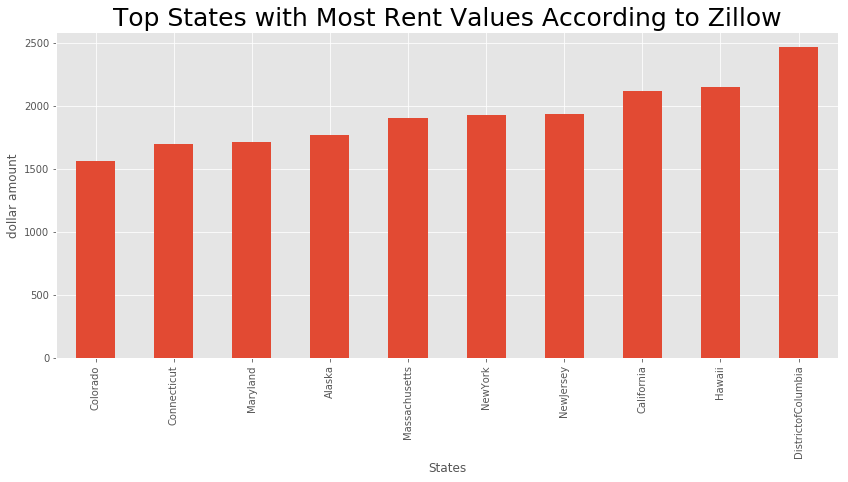

In [11]:
## Lets see how the rent is for these states. 
state_time_series.Date = pd.to_datetime(state_time_series.Date)
state_without_null = state_time_series.dropna(subset=['ZRI_AllHomes'], how='any')
state_without_null.Date = state_without_null.Date.dt.year

plt.subplots(figsize = (14,6))
state_without_null.groupby(state_without_null.RegionName)['ZRI_AllHomes'].mean().sort_values().tail(10).plot(kind = 'bar')
plt.title('Top States with Most Rent Values According to Zillow', fontsize = 25)
plt.xlabel('States')
plt.ylabel('dollar amount');

In [12]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'DistrictofColumbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'NorthCarolina',
        'ND': 'NorthDakota',
        'NE': 'Nebraska',
        'NH': 'NewHampshire',
        'NJ': 'NewJersey',
        'NM': 'NewMexico',
        'NV': 'Nevada',
        'NY': 'NewYork',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'RhodeIsland',
        'SC': 'SouthCarolina',
        'SD': 'SouthDakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'VirginIslands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'WestVirginia',
        'WY': 'Wyoming'
}



In [13]:
states_w_n_zhvi_all = state_without_null.groupby(state_without_null.RegionName)['ZHVI_AllHomes'].mean().reset_index(name = 'ZHVI_AllHomes')
states_w_n_zhvi_all.dropna(inplace=True)

In [14]:
states_w_n_zhvi_all.head(2)

,RegionName,ZHVI_AllHomes
0,Alabama,119202.439024
1,Alaska,253176.923077


In [15]:
## Replacing the state names into acronyms. 
## This list comprehension is broken down in order to have a better understanding of the code
states_w_n_zhvi_all.RegionName = [
    j ## output
    for j in states ## outer loop 
    for i in states_w_n_zhvi_all["RegionName"] ## inner loop 
    if i == states[j]] ## if statement

In [16]:
states_w_n_zhvi_all.head(2)

,RegionName,ZHVI_AllHomes
0,AK,119202.439024
1,AL,253176.923077


In [17]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],[0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


# difine our data for plotting
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = True,
        locations = states_w_n_zhvi_all.RegionName, # location (states)
        z = states_w_n_zhvi_all['ZHVI_AllHomes'].astype(float), # Zillow Home value per square foot
        locationmode = 'USA-states', # let's define the location mode to USA_states
        text = "Average zillow home value",
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Mean ZHVI for all home")
        ) ]

layout = dict(
        title = 'Median of the value of all homes per square foot in different states<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(0, 200, 255)'),
             )




    
fig = dict( data=data, layout=layout )
# let's plot
py.iplot( fig, filename='d3ropleth-map' )

## Let's look at the zillow's estimated price per sqare feet. 
***
It looks like housing price increased during 2005-2008 and decreased during 2011-2012 year. 

In [18]:
city_time_series.Date = pd.to_datetime(city_time_series.Date)
zhvi_sqf_all = city_time_series.dropna(subset=['ZHVIPerSqft_AllHomes'],how='any')

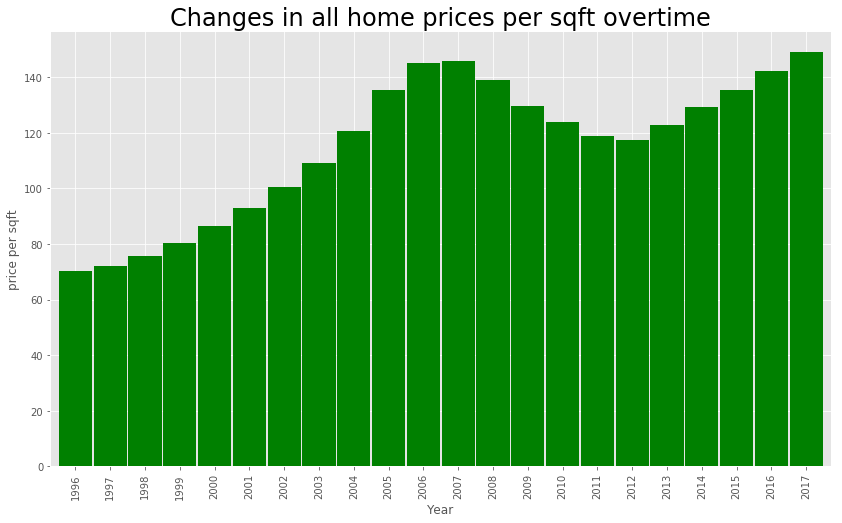

In [19]:
plt.subplots(figsize = (14,8))
zhvi_sqf_all.groupby(zhvi_sqf_all.Date.dt.year)['ZHVIPerSqft_AllHomes'].mean().plot(kind = 'bar', width = .95, color = 'g')
plt.ylabel("price per sqft")
plt.xlabel("Year")
plt.title("Changes in all home prices per sqft overtime", fontsize = 24)
plt.show()



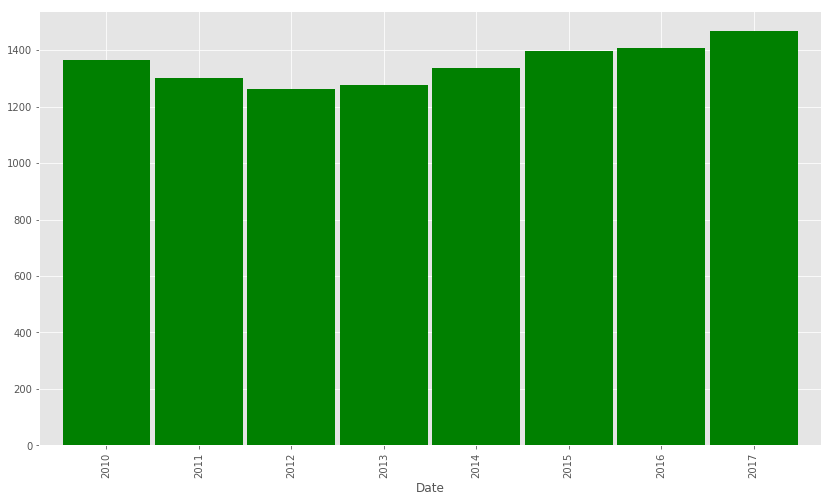

In [20]:
zri_all = city_time_series.dropna(subset=['MedianRentalPrice_AllHomes'], how='any');
fig, ax = plt.subplots(figsize = (14,8))
zri_all.groupby(zri_all.Date.dt.year)['MedianRentalPrice_AllHomes'].mean().plot(kind = 'bar',width = .95, color = 'g')

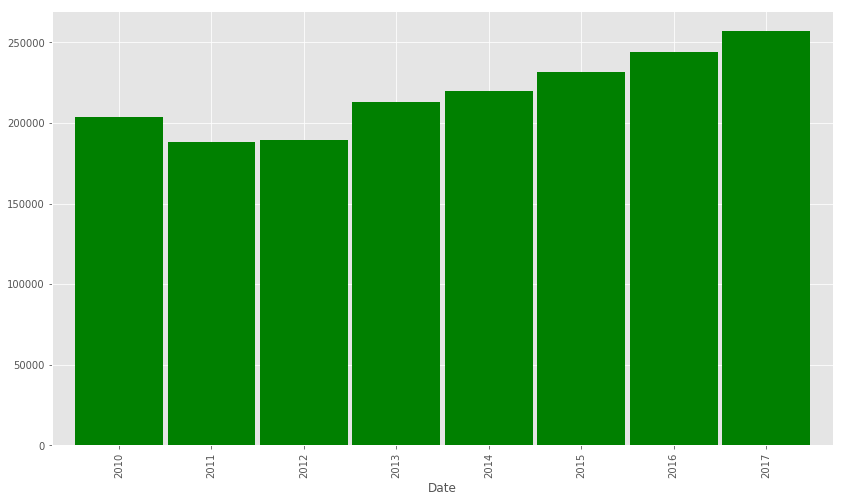

In [21]:
zri_all = city_time_series.dropna(subset=['MedianListingPrice_AllHomes'], how='any');
fig, ax = plt.subplots(figsize = (14,8))
zri_all.groupby(zri_all.Date.dt.year)['MedianListingPrice_AllHomes'].mean().plot(kind = 'bar',width = .95, color = 'g')